“In this section, we load the data, validate data quality (missing values, duplicates, types), convert dates, remove non-informative identifiers, and prepare time-ordered datasets for EDA and modeling.”

In [101]:
import optuna
import optuna.visualization as vis
import time

import scipy.stats as st

from sklearn.datasets import  fetch_california_housing
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor

from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, root_mean_squared_error, make_scorer

from sklearn.model_selection import cross_val_score

In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor

from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, root_mean_squared_error

In [3]:
day_df = pd.read_csv("../data/raw/day.csv")

In [4]:
print(day_df.shape)

(731, 16)


In [5]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [6]:
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


## Initial Cleaning

In [7]:
#Convert object type to datetime for date column
day_df["dteday"] = pd.to_datetime(day_df["dteday"])

In [8]:
print(day_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

In [9]:
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [10]:
#Drop instant (ID column)
day_df.drop(columns=["instant"], inplace=True)

In [11]:
#Missing values?
print(day_df.isna().sum())


dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64


In [12]:
#duplicates?
print(day_df.duplicated().sum())


0


In [13]:
# Sort by time
day_df = day_df.sort_values("dteday").reset_index(drop=True)


In [14]:
#Leakage columns dropping
day_df.drop(columns=["casual", "registered"], inplace=True)

In [15]:
day_df.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,985
1,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,801
2,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,1349
3,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,1562
4,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,1600


In [16]:
day_df['weathersit'].value_counts()

weathersit
1    463
2    247
3     21
Name: count, dtype: int64

In [17]:
day_df['season'].value_counts()

season
3    188
2    184
1    181
4    178
Name: count, dtype: int64

In [18]:
day_clean = day_df.copy()

In [19]:
#choosing the columns that we would like to analyze

In [20]:
#Target column
target_col = "cnt"

## EDA

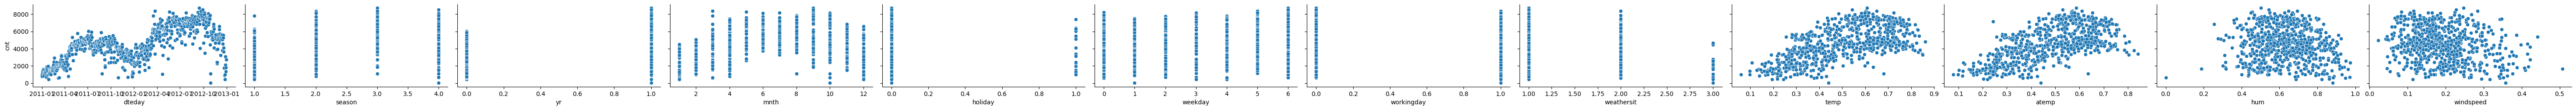

In [21]:
#Loading and preparing the data
import matplotlib.pyplot as plt
import seaborn as sns
sns.pairplot(day_clean, y_vars=['cnt'], x_vars=day_clean.columns[:-1], kind='scatter', aspect= 2)

In [22]:
#sns.pairplot(day_clean, hue="season")
#plt.show()

In [23]:
X = day_clean.drop(columns=["cnt", "dteday", "atemp"])
y = day_clean["cnt"]

In [24]:
day_clean["yr"].value_counts().sort_index()

yr
0    365
1    366
Name: count, dtype: int64

## Train Test Split

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state=0)

In [29]:
X_train.shape

(584, 10)

In [31]:
X_test.shape

(147, 10)

In [32]:
y_train.shape

(584,)

In [33]:
y_test.shape

(147,)

# Variable type

In [236]:
X_train

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed
97,2,0,4,0,5,1,2,0.335833,0.836250,0.226992
503,2,1,5,0,5,1,1,0.564167,0.523333,0.136817
642,4,1,10,0,4,1,2,0.657500,0.722917,0.117546
498,2,1,5,0,0,0,1,0.612500,0.576250,0.225117
303,4,0,10,0,1,1,1,0.340000,0.703333,0.106350
...,...,...,...,...,...,...,...,...,...,...
707,4,1,12,0,6,0,2,0.381667,0.911250,0.101379
192,3,0,7,0,2,1,1,0.794167,0.559167,0.200254
629,3,1,9,0,5,1,1,0.599167,0.668750,0.154229
559,3,1,7,0,5,1,2,0.731667,0.485833,0.080850


In [237]:
categorical_feat = ["season", "mnth", "weekday", "weathersit","yr","workingday","holiday"] # OHE
numerical_feat = ["temp", "hum", "windspeed"] # Scale

## OneHotEncoder

In [238]:
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder(sparse_output=False, drop='first') # To avoid having an sparse_matrix as output


In [239]:
ohe.fit(X_train[categorical_feat]) # The .fit() method determines the unique values of each column
X_train_trans_np = ohe.transform(X_train[categorical_feat])
X_train_trans_np

array([[1., 0., 0., ..., 0., 1., 0.],
       [1., 0., 0., ..., 1., 1., 0.],
       [0., 0., 1., ..., 1., 1., 0.],
       ...,
       [0., 1., 0., ..., 1., 1., 0.],
       [0., 1., 0., ..., 1., 1., 0.],
       [0., 0., 1., ..., 1., 1., 0.]], shape=(584, 25))

In [240]:
X_train_trans_df = pd.DataFrame(X_train_trans_np, columns=ohe.get_feature_names_out(), index=X_train.index)
#X_train_trans_df

In [241]:
X_test_trans_np = ohe.transform(X_test[categorical_feat])
#X_test_trans_np

In [242]:
X_test_trans_df = pd.DataFrame(X_test_trans_np, columns=ohe.get_feature_names_out(), index=X_test.index)
#X_test_trans_df

# Scaler

In [243]:
scaler = StandardScaler()

scaler.fit(X_train[numerical_feat])

X_train_scaled_np = scaler.transform(X_train[numerical_feat])
X_test_scaled_np  = scaler.transform(X_test[numerical_feat])

X_train_standarized = pd.DataFrame(X_train_scaled_np, columns=scaler.get_feature_names_out(), index=X_train.index)
X_test_standarized  = pd.DataFrame(X_test_scaled_np, columns=scaler.get_feature_names_out(), index=X_test.index)


In [244]:
X_train_standarized

,temp,hum,windspeed
97,-0.845148,1.517365,0.490775
503,0.394863,-0.716387,-0.689399
642,0.901725,0.708339,-0.941611
498,0.657344,-0.338640,0.466236
303,-0.822519,0.568539,-1.088139
...,...,...,...
707,-0.596238,2.052751,-1.153198
192,1.643922,-0.460587,0.140839
629,0.584937,0.321669,-0.461518
559,1.304503,-0.984080,-1.421873


# Concatenate preprocessed data

In [245]:
X_train_full = pd.concat([X_train_standarized,X_train_trans_df], axis=1)
X_train_full

,temp,hum,windspeed,season_2,season_3,season_4,mnth_2,mnth_3,mnth_4,mnth_5,...,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3,yr_1,workingday_1,holiday_1
97,-0.845148,1.517365,0.490775,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
503,0.394863,-0.716387,-0.689399,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
642,0.901725,0.708339,-0.941611,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
498,0.657344,-0.338640,0.466236,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
303,-0.822519,0.568539,-1.088139,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
707,-0.596238,2.052751,-1.153198,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0
192,1.643922,-0.460587,0.140839,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
629,0.584937,0.321669,-0.461518,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
559,1.304503,-0.984080,-1.421873,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0


In [246]:
X_test_full = pd.concat([X_test_standarized,X_test_trans_df], axis=1)
X_test_full

,temp,hum,windspeed,season_2,season_3,season_4,mnth_2,mnth_3,mnth_4,mnth_5,...,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3,yr_1,workingday_1,holiday_1
196,1.060122,-0.276179,0.246691,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
187,1.404064,0.196746,-0.396460,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
14,-1.401794,-0.891873,-0.412649,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
31,-1.625316,1.469644,-1.783575,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
390,-0.813466,1.041464,-1.519431,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
566,0.946979,1.573880,0.254871,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0
688,-0.600767,-0.002539,0.596458,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
266,0.625667,1.704750,-1.454156,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
504,0.589461,-1.195258,-1.380975,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


In [235]:
X_train

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed
97,2,0,4,0,5,1,2,0.335833,0.836250,0.226992
503,2,1,5,0,5,1,1,0.564167,0.523333,0.136817
642,4,1,10,0,4,1,2,0.657500,0.722917,0.117546
498,2,1,5,0,0,0,1,0.612500,0.576250,0.225117
303,4,0,10,0,1,1,1,0.340000,0.703333,0.106350
...,...,...,...,...,...,...,...,...,...,...
707,4,1,12,0,6,0,2,0.381667,0.911250,0.101379
192,3,0,7,0,2,1,1,0.794167,0.559167,0.200254
629,3,1,9,0,5,1,1,0.599167,0.668750,0.154229
559,3,1,7,0,5,1,2,0.731667,0.485833,0.080850


In [106]:
def regression_diagnostic_plot(model, X, y, title="Actual vs Predicted"):
    
    # Predictions
    y_pred = model.predict(X)
    
    # Metrics
    mae = mean_absolute_error(y, y_pred)
    mse = mean_squared_error(y, y_pred)
    rmse = root_mean_squared_error(y, y_pred)
    r2 = model.score(X, y)
    corr, _ = pearsonr(y, y_pred)
    
    # Plot
    plt.figure(figsize=(5, 5))
    
    sns.scatterplot(
        x=y,
        y=y_pred,
        color="#00BF63",
        alpha=0.6
    )
    
    # Diagonal perfect-fit line
    min_val = min(y.min(), y_pred.min())
    max_val = max(y.max(), y_pred.max())
    
    plt.plot(
        [min_val, max_val],
        [min_val, max_val],
        linestyle="--",
        color="black",
        linewidth=1
    )
    
    # Square axis
    plt.gca().set_aspect("equal", adjustable="box")
    plt.xlim(min_val, max_val)
    plt.ylim(min_val, max_val)
    
    # Labels & title
    plt.xlabel("Actual values")
    plt.ylabel("Predicted values")
    plt.title(title)
    
    # Annotation box
    textstr = (
        f"MAE: {mae:.2f}\n"
        f"RMSE: {rmse:.2f}\n"
        f"R²: {r2:.2f}\n"
        f"Corr: {corr:.2f}"
    )
    
    plt.text(
        0.05, 0.95,
        textstr,
        transform=plt.gca().transAxes,
        fontsize=10,
        verticalalignment="top",
        bbox=dict(boxstyle="round", facecolor="white", alpha=0.8)
    )
    
    plt.tight_layout()
    plt.show()


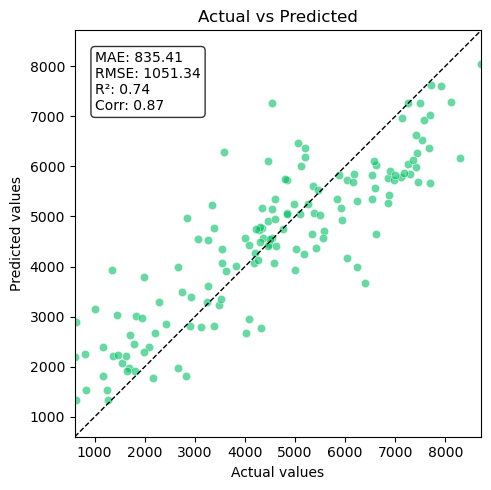

In [279]:
# KNeighborsRegressor
mdl = KNeighborsRegressor()
mdl.fit(X_train_full, y_train)
regression_diagnostic_plot(mdl, X_test_full, y_test)

# Linear Regression

In [107]:
from sklearn.linear_model import LinearRegression

In [247]:
lin_reg = LinearRegression()
lin_reg.fit(X_train_full, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


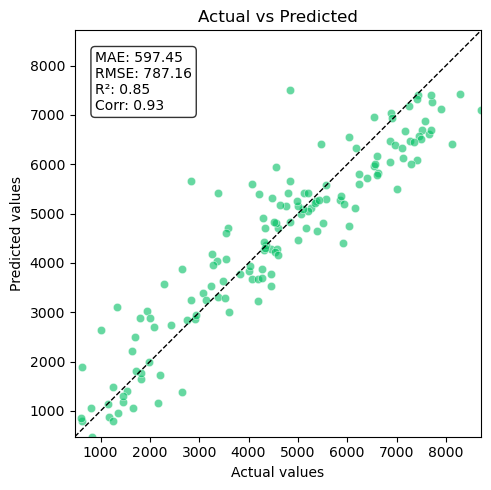

In [248]:
regression_diagnostic_plot(lin_reg, X_test_full, y_test)

# DecisionTreeRegressor

In [249]:
from sklearn.tree import DecisionTreeRegressor

In [270]:
tree = DecisionTreeRegressor(max_depth=2)

In [271]:
tree.fit(X_train_full, y_train)

,criterion,'squared_error'
,splitter,'best'
,max_depth,2
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,ccp_alpha,0.0


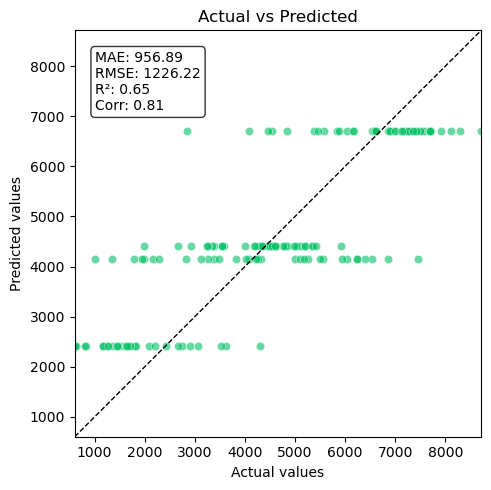

In [272]:
regression_diagnostic_plot(tree, X_test_full, y_test)

In [273]:
from sklearn.tree import export_text

tree_viz = export_text(tree, feature_names=list(X_train_full.columns))
print(tree_viz)

|--- temp <= -0.15
|   |--- yr_1 <= 0.50
|   |   |--- value: [2424.88]
|   |--- yr_1 >  0.50
|   |   |--- value: [4151.02]
|--- temp >  -0.15
|   |--- yr_1 <= 0.50
|   |   |--- value: [4407.89]
|   |--- yr_1 >  0.50
|   |   |--- value: [6697.35]



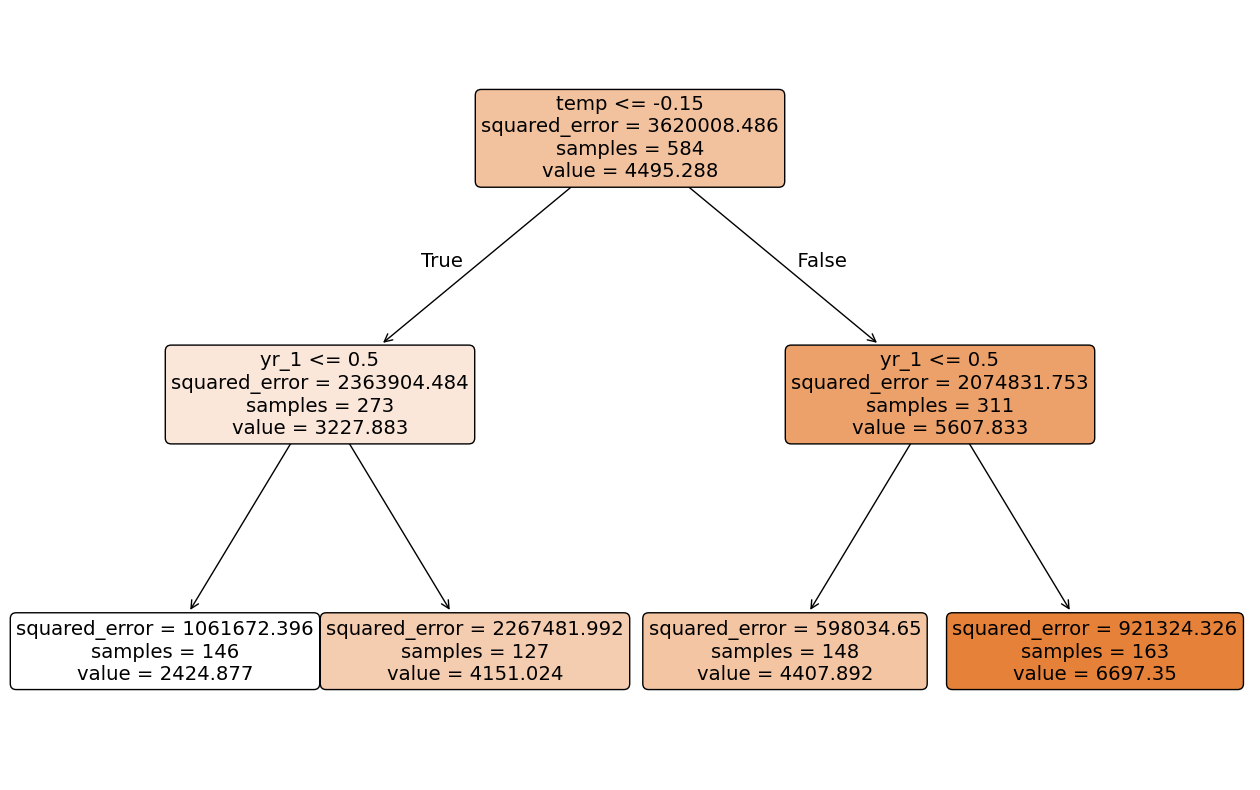

In [274]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(16,10))
plot_tree(tree, feature_names=X_train_full.columns, filled=True, rounded=True)
plt.show()

# Random forest

In [255]:
from sklearn.ensemble import BaggingRegressor, RandomForestRegressor,AdaBoostRegressor, GradientBoostingRegressor

In [256]:
forest = RandomForestRegressor(n_estimators=1000, max_depth=50)

In [257]:
forest.fit(X_train_full, y_train)

,n_estimators,1000
,criterion,'squared_error'
,max_depth,50
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


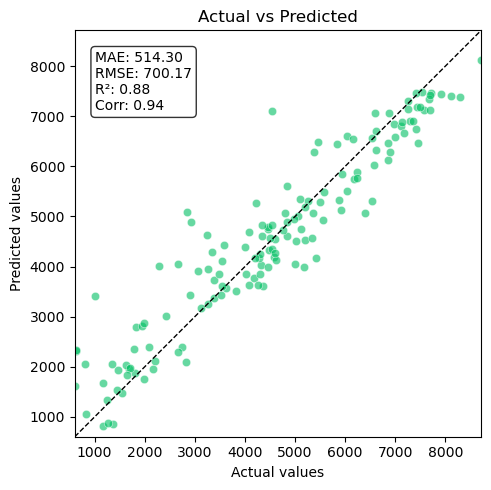

In [258]:
regression_diagnostic_plot(forest, X_test_full, y_test)

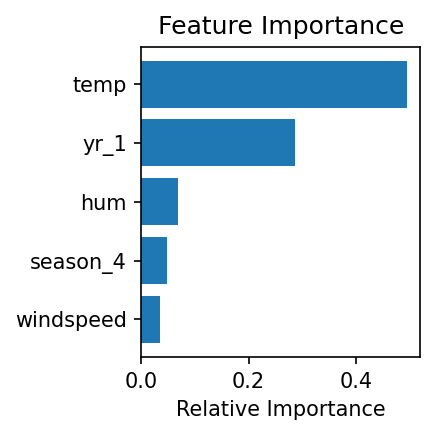

In [259]:
import numpy as np
import matplotlib.pyplot as plt

# Feature importances from Random Forest
importances = forest.feature_importances_

# Sort features by importance
indices = np.argsort(importances)[-5:]

# Plot
plt.figure(figsize=(3, 3),dpi=150)
plt.title('Feature Importance')
plt.barh(range(len(indices)), importances[indices], align='center')
plt.yticks(range(len(indices)), [X_train_full.columns[i] for i in indices])
plt.xlabel('Relative Importance')
plt.tight_layout()
plt.show()


# Gradient Boosting

In [263]:
gb_reg = GradientBoostingRegressor(max_depth=50,n_estimators=1000)

In [264]:
gb_reg.fit(X_train_full, y_train)

,loss,'squared_error'
,learning_rate,0.1
,n_estimators,1000
,subsample,1.0
,criterion,'friedman_mse'
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_depth,50
,min_impurity_decrease,0.0
,init,None


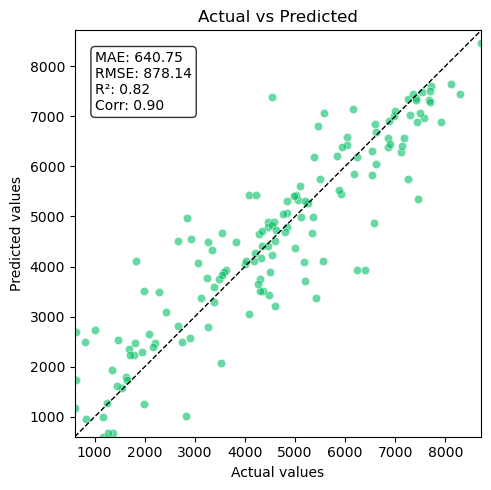

In [265]:
regression_diagnostic_plot(gb_reg, X_test_full, y_test)

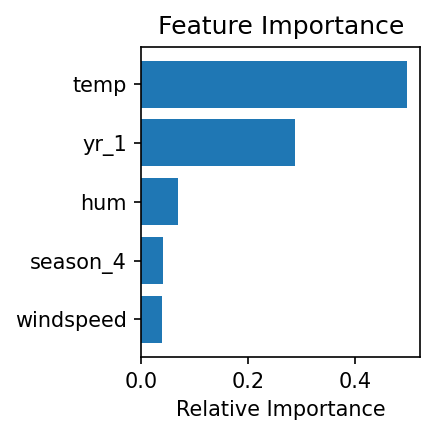

In [266]:
import numpy as np
import matplotlib.pyplot as plt

# Feature importances from the trained Gradient Boosting model
importances = gb_reg.feature_importances_

# Sort features by importance
indices = np.argsort(importances)[-5:]

# Plot
plt.figure(figsize=(3, 3),dpi=150)
plt.title('Feature Importance')
plt.barh(range(len(indices)), importances[indices], align='center')
plt.yticks(range(len(indices)), [X_train_full.columns[i] for i in indices])
plt.xlabel('Relative Importance')
plt.tight_layout()
plt.show()


# Grid Search

In [267]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV, KFold
import optuna
import optuna.visualization as vis
import time

In [275]:
# First we need to setup a dictionary with all the values that we want to try for each hyprerparameter

parameter_grid = {"max_depth": [10, 50],
                  "min_samples_split": [4, 16],
                  "max_leaf_nodes": [250, 100],
                  "max_features": ["sqrt", "log2", None]} # In example we're going to test 2 * 2 * 2 * 2 = 16 combinations of hyperparameters

# We create an instance or our machine learning model
dt = DecisionTreeRegressor(random_state=123)

# We need to set this two variables to be able to compute a confidence interval
confidence_level = 0.95
folds = 10

# Now we need to create an intance of the GridSearchCV class
#The option 'scoring', alonside with new_metric ='make_scorer' allows you to evaluate the model performance
gs = GridSearchCV(dt, param_grid=parameter_grid, cv=folds, verbose=10) # Here the "cv" allows you to define the number of folds to use.

start_time = time.time()
gs.fit(X_train_full, y_train)
end_time = time.time()

print("\n")
print(f"Time taken to find the best combination of hyperparameters among the given ones: {end_time - start_time: .4f} seconds")
print("\n")


print(f"The best combination of hyperparameters has been: {gs.best_params_}")
print(f"The R2 is: {gs.best_score_: .4f}")

results_gs_df = pd.DataFrame(gs.cv_results_).sort_values(by="mean_test_score", ascending=False)

#print(results_df.head())
gs_mean_score = results_gs_df.iloc[0,-3]
gs_sem = results_gs_df.iloc[0,-2] / np.sqrt(10)

gs_tc = st.t.ppf(1-((1-confidence_level)/2), df=folds-1)
gs_lower_bound = gs_mean_score - ( gs_tc * gs_sem )
gs_upper_bound = gs_mean_score + ( gs_tc * gs_sem )

print(f"The R2 confidence interval for the best combination of hyperparameters is: \
    ({gs_lower_bound: .4f}, {gs_mean_score: .4f}, {gs_upper_bound: .4f}) ")

#display(results_df)

# Let's store the best model
best_model = gs.best_estimator_

Fitting 10 folds for each of 24 candidates, totalling 240 fits
[CV 1/10; 1/24] START max_depth=10, max_features=sqrt, max_leaf_nodes=250, min_samples_split=4
[CV 1/10; 1/24] END max_depth=10, max_features=sqrt, max_leaf_nodes=250, min_samples_split=4;, score=0.533 total time=   0.1s
[CV 2/10; 1/24] START max_depth=10, max_features=sqrt, max_leaf_nodes=250, min_samples_split=4
[CV 2/10; 1/24] END max_depth=10, max_features=sqrt, max_leaf_nodes=250, min_samples_split=4;, score=0.570 total time=   0.1s
[CV 3/10; 1/24] START max_depth=10, max_features=sqrt, max_leaf_nodes=250, min_samples_split=4
[CV 3/10; 1/24] END max_depth=10, max_features=sqrt, max_leaf_nodes=250, min_samples_split=4;, score=0.428 total time=   0.0s
[CV 4/10; 1/24] START max_depth=10, max_features=sqrt, max_leaf_nodes=250, min_samples_split=4
[CV 4/10; 1/24] END max_depth=10, max_features=sqrt, max_leaf_nodes=250, min_samples_split=4;, score=0.513 total time=   0.0s
[CV 5/10; 1/24] START max_depth=10, max_features=sqrt

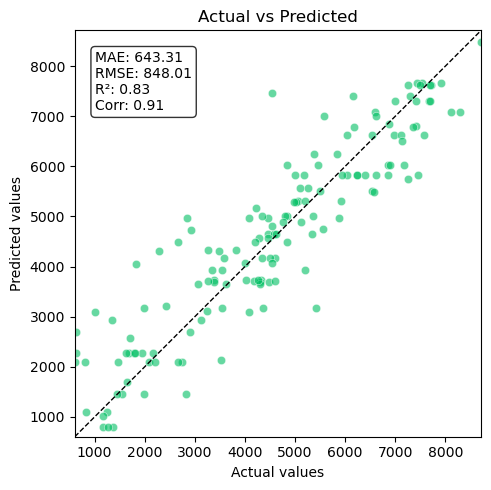

In [276]:
regression_diagnostic_plot(best_model, X_test_full, y_test)